<div class="alert alert-block alert-success">

#  BA Carriers ratings in CentralDispatch
    
</div>

In [378]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [379]:
df = pd.read_csv("rt.csv")
df["Date"]= pd.to_datetime(df["Date"],dayfirst =True)
df['month_name'] = df['Date'].dt.month_name().str[:3]

In [380]:
df_status_count = df.Status.value_counts().to_frame().reset_index()

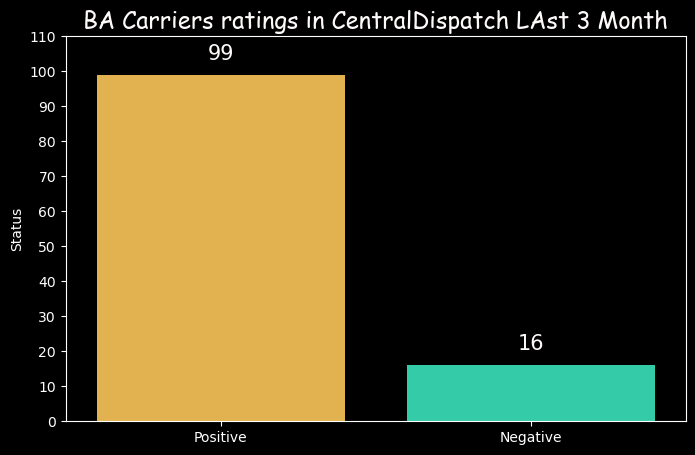

In [381]:
plt.figure(figsize=(8,5))
color = ['navy','darkred']
plots = sns.barplot(x = df_status_count["index"], y = df_status_count["Status"],palette="turbo_r")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size= 15, xytext=(0, 15),color = "snow",
                   textcoords='offset points')
    
plt.tick_params(axis='x', rotation=90)
plt.title("BA Carriers ratings in CentralDispatch LAst 3 Month",fontdict={'fontsize': 17, 'fontname' : 
                                      'Comic Sans MS', "color": "snow"})

plt.yticks(np.arange(0,111,10))
plt.xlabel(None)
plt.xticks(rotation = 0)
plt.show()

In [362]:
df_m = pd.read_csv("month.csv")

### ივნისთან შედარებით  ივლისში და აგვისტოში გაზრდილია რეიტინგების ჯამური რაოდენობა, ასევე გაზრდილია ნეგატივებიც, ივლისის და აგვისტოს მაჩვენებელი თითქმის თანაბარია იმის გათვალისწინებით, რომ აგვისტო დასრულებული არ არის. ამ ციფრების მიხედვით სექტემბრის ბოლომდე 100  პოზიტივის  მიღება არარეალურად მეჩვენება, თუმცაღა ადამიანის მონდომება და მოტივაცია სასწაულებს აკეთებს...

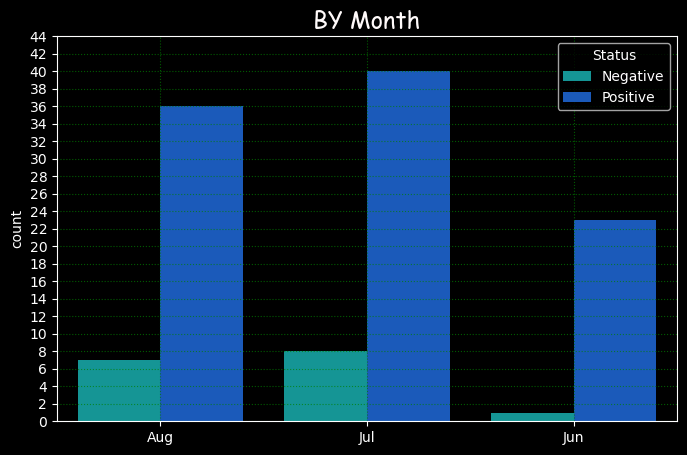

In [341]:
plt.figure(figsize=(8,5))
sns.barplot(x='Month', y='count',data = df_m ,hue= 'Status', palette='winter_r' )
plt.title("BY Month",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 


plt.grid(linestyle= ":",alpha = 0.7,color = 'g')
plt.yticks(np.arange(0,45,2))
plt.xlabel(None)
plt.show()

### არიან კომპანიები რომლებთაც სხვადასხვა დღეებში ერთზე მეტჯერ აქვთ პოზიტივი დაწერილი, მაგალითად Marvel Auto Transport LLC - 4 პოზიტივი აქვს სხვადასვა თარიღებში თუმცა ერთი ნეგატივიც "cancel load"

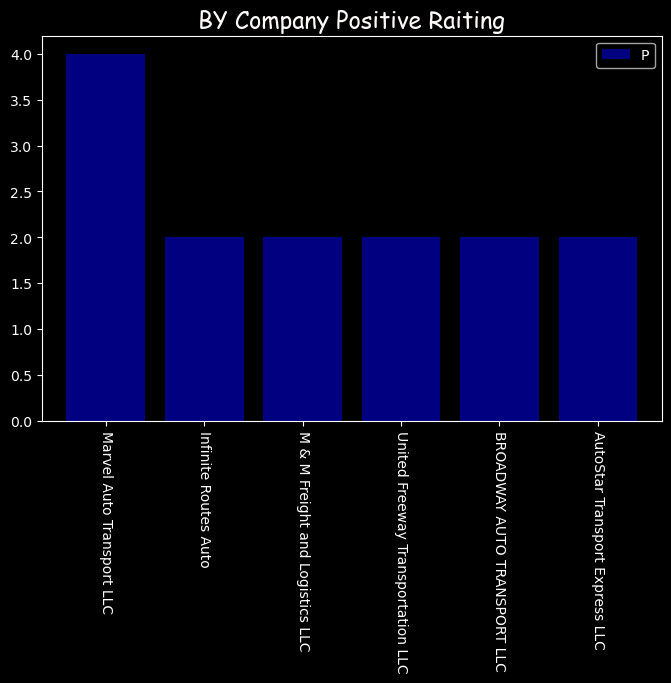

In [377]:
color = ['navy']
df[df["Status"] == 'Positive'].groupby("Company").agg({"Status":"count"})\
    .sort_values("Status",ascending=False).head(6).plot(kind="bar",figsize=(8,5),color = color, width = 0.8)

plt.title("BY Company Positive Raiting",
          fontdict={'fontsize': 17, 'fontname' : 'Comic Sans MS', "color": "snow"}) 

plt.xticks(rotation = -90)
plt.xlabel(None)
plt.legend("P")
plt.show()